**Progress Report #4 - Learning**

Team Name: Regal Royals

1. Shinhyuk Park
2. Devin Dupree
3. Samnang Pech

# **Dataset**

Name: Electric Vehicle Population Data

Size: 205440 + 17 features

Features:
- **VIN (1-10):** The first 10 characters of the Vehicle Identification Number, a unique identifier for each vehicle.
- **County:** The county where the vehicle is registered.
- **City:** The city where the vehicle is registered.
- **State:** The state where the vehicle is registered.
- **Postal Code:** The postal code corresponding to the vehicle's registration address.
- **Model Year:** The year the vehicle was manufactured.
- **Make:** The manufacturer of the vehicle (e.g., Tesla, Nissan).
- **Model:** The specific model of the vehicle (e.g., Model 3, Leaf).
- **Electric Vehicle Type:** Whether the vehicle is a battery electric vehicle (BEV) or a plug-in hybrid electric vehicle (PHEV).
- **Clean Alternative Fuel Vehicle:** Whether the vehicle qualifies as a clean alternative fuel vehicle.
- **Electric Range:** The range the vehicle can travel on electric power alone (in miles).
- **Base MSRP:** The Manufacturer’s Suggested Retail Price (base price) of the vehicle.
- **Legislative District:** The legislative district associated with the vehicle's registration.
- **DOL Vehicle ID:** An internal identifier used by the Department of Licensing for the vehicle.
- **Vehicle Location:** The geographical coordinates (latitude and longitude) of the vehicle’s registration location.
- **Electric Utility:** The electric utility provider associated with the vehicle’s registration address.
- **2020 Census Tract:** The census tract where the vehicle is registered, based on the 2020 Census data.

*We have added an additional dataset containing columns with numerical values that are well-suited for a linear regression model with multiple features.*

Name: NYSERDA Electric Vehicle Drive Clean Rebate Program

Size: 168,775 + 11 features

Features:
- **Data through Date**: Indicates the data cutoff date for the entry.
- **Submitted Date**: The date when the rebate application was submitted.
- **Make**: The manufacturer of the vehicle (e.g., Jeep).
- **Model**: The specific model of the vehicle (e.g., Wrangler).
- **County**: The county in which the rebate was claimed (e.g., Nassau).
- **ZIP**: The postal code associated with the rebate application.
- **EV Type**: The type of electric vehicle (e.g., Plug-in Hybrid Electric Vehicle (PHEV)).
- **Transaction Type**: Indicates whether the vehicle was purchased or leased.
- **Annual GHG Emissions Reductions (MT CO2e)**: The estimated annual greenhouse - gas emissions reduced by the EV (measured in metric tons of CO2 equivalent).
- **Annual Petroleum Reductions (gallons)**: The estimated annual petroleum saved by using the EV (measured in gallons).
- **Rebate Amount (USD)**: The monetary rebate provided for the EV (in USD).

This code imports various Python libraries for data analysis, machine learning, and plotting. It then loads an electric vehicle dataset from an online source (Excel file) into a DataFrame called eCar, preparing it for further analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import r_regression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier



url = 'https://raw.githubusercontent.com/shinPark43/CS-4330---Project-Regal-Royals-/main/dataset/Electric_Vehicle_Population_Data.xlsx'
eCar = pd.read_excel(url)

url2 = 'https://raw.githubusercontent.com/shinPark43/CS-4330---Project-Regal-Royals-/main/dataset/NYSERDA_Electric_Vehicle_Drive_Clean_Rebate_Data__Beginning_2017.csv'
eCar2 = pd.read_csv(url2)

# **Supervised Learning**

This section implements the k-nearest neighbors method and applies it to the consumables usage eCar dataset to demonstrate the effectiveness of the algorithm.


1. This code filters an electric vehicle dataset (eCar) to focus on five specific car manufacturers: Tesla, Ford, Nissan, Chevrolet, and BMW. It ensures that only rows with non-missing values for "Model Year" and "Electric Range" are included and filters for vehicles made from 2010 onwards. The filtered data is then split into features (containing "Model Year" and "Electric Range") and labels (containing the car makes). Using the train_test_split function, the data is divided into training (70%) and testing (30%) sets. A k-nearest neighbors classifier is initialized with 5 neighbors and trained on the training data. Finally, the trained model predicts the car makes for the test set based on the given features.

In [21]:
eCar_five_makes = eCar[eCar['Make'].isin(['TESLA', 'FORD', 'NISSAN', 'CHEVROLET', 'BMW']) & (~eCar[['Model Year', 'Electric Range']].isna().any(axis=1))]
eCar_five_makes = eCar_five_makes[eCar_five_makes['Model Year'] >= 2010]

X_knn = eCar_five_makes[['Model Year', 'Electric Range']].values
y_knn = eCar_five_makes['Make'].values

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.3, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_knn, y_train_knn)

y_pred_knn = knn_model.predict(X_test_knn)

2. The code below evaluates the accuracy of the k-nearest neighbors model in predicting car manufacturers based on "Model Year" and "Electric Range." The metrics.accuracy_score function compares the predicted car makes with the actual test labels and calculates the model's accuracy, which is printed. It then visualizes the test results using a scatter plot. Each car make is assigned a unique color, and the test data points are plotted with "Model Year" on the x-axis and "Electric Range" on the y-axis. The plot shows how well the k-NN model distinguishes between different car manufacturers and provides a visual understanding of the relationship between the features and the predictions. The legend identifies each color with its corresponding car make.

K-Nearest Neighbors Model Accuracy for Five Makes: 0.8599


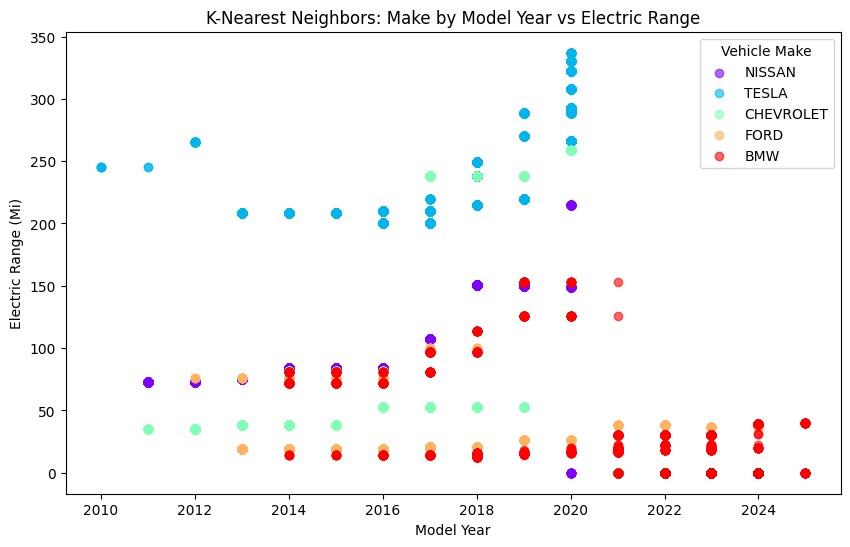

In [22]:
knn_accuracy = metrics.accuracy_score(y_test_knn, y_pred_knn)
print(f"K-Nearest Neighbors Model Accuracy for Five Makes: {knn_accuracy:.4f}")

unique_makes = eCar_five_makes['Make'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_makes)))
make_color_map = dict(zip(unique_makes, colors))

plt.figure(figsize=(10, 6))
for make in unique_makes:
    mask = (y_test_knn == make)
    plt.scatter(X_test_knn[mask, 0], X_test_knn[mask, 1], color=make_color_map[make], label=make, alpha=0.6)

plt.xlabel('Model Year')
plt.ylabel('Electric Range (Mi)')
plt.title('K-Nearest Neighbors: Make by Model Year vs Electric Range')
plt.legend(title='Vehicle Make')
plt.show()

**Interpretation**
* From the plot, we can see that the K-Nearest Neighbors (KNN) model effectively differentiates between five car manufacturers (Tesla, Ford, Nissan, Chevrolet, BMW) based on Model Year and Electric Range. The accuracy score of 0.8599 suggests the model performs well in predicting the vehicle make, with each manufacturer represented by a distinct color. Tesla vehicles (blue points) are generally concentrated at higher electric ranges, while Ford, Chevrolet, BMW, and Nissan are distributed across various ranges. This indicates that Tesla focuses on longer ranges, while the other manufacturers offer a mix of electric range capabilities. The distinct separation of colors in the plot shows that the KNN model is able to distinguish between different manufacturers fairly clearly based on these two features.

# **Unsupervised Learning**

This section utilizes the k-means clustering method and applies it to the consumables usage dataset (Annual GHG Emissions Reductions [MT CO2e] and Annual Petroleum Reductions [gallons]), demonstrating the effectiveness of the algorithm.

1. Clean the Data and Select Features

The data is cleaned by removing rows with missing values. Two features are selected for clustering: Annual GHG Emissions Reductions (MT CO2e) and Annual Petroleum Reductions (gallons). These features represent environmental and fuel efficiency impacts.

In [ ]:
#Start # Clean the data (drop rows with missing values)
eCar2 = eCar2.dropna()

# Select relevant features for clustering
X = eCar2[['Annual GHG Emissions Reductions (MT CO2e)', 'Annual Petroleum Reductions (gallons)']]


**Interpretation**


*   The result is a clean dataset focused on meaningful attributes. Clustering will likely group the data into categories of low, moderate, and high environmental and fuel efficiency impact. These groups can highlight areas or vehicles that need improvement or are performing well.




2. Apply K-means Clustering

K-means is applied with 3 clusters. Each data point is assigned to a cluster, and centroids are calculated as the average characteristics of the clusters.

In [ ]:
# Initialize K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the model and predict clusters
eCar2['Cluster'] = kmeans.fit_predict(X)

# Get centroids of the clusters
centroids = kmeans.cluster_centers_
print("Centroids of clusters:\n", centroids)

Centroids of clusters:
 [[ 2.89753863e+00  5.91832356e+02]
 [-2.57332059e-01  1.87765130e+02]
 [ 2.37462565e+00  4.41127992e+02]]


**Interpretation**


*   The clusters represent different performance levels. Cluster 0, with the highest GHG reduction (2.90 MT CO2e) and petroleum savings (592 gallons), shows excellent performance. Cluster 1, with minimal GHG reduction (-0.26 MT CO2e) and low petroleum savings (188 gallons), highlights underperformers needing improvement. Cluster 2, with moderate reductions (2.37 MT CO2e, 441 gallons), represents average performers. These clusters help identify areas of excellence and opportunities for improvement.




3. Visualize the Clusters

A scatter plot shows the data points grouped by clusters, with centroids marked as red "X". Each cluster is color-coded for easy identificatio

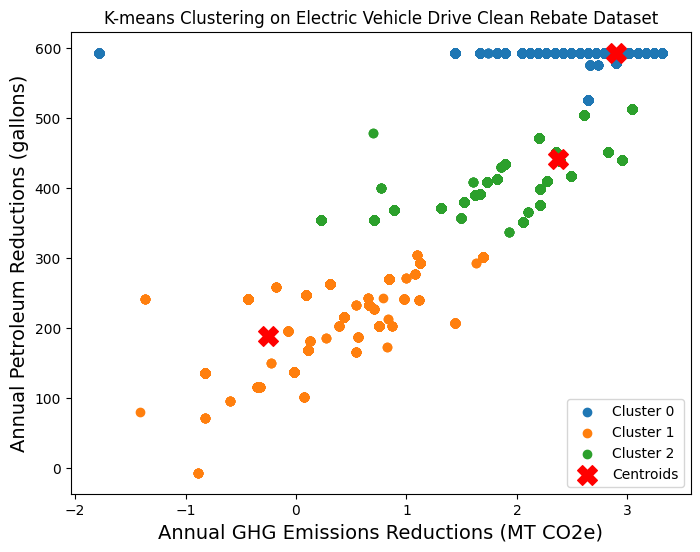

In [ ]:
# Plot clusters and centroids
plt.figure(figsize=(8, 6))

# Loop through clusters and plot each
for cluster in range(3):
    cluster_data = eCar2[eCar2['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual GHG Emissions Reductions (MT CO2e)'],
                cluster_data['Annual Petroleum Reductions (gallons)'],
                label=f'Cluster {cluster}')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

# Add labels and legend
plt.xlabel('Annual GHG Emissions Reductions (MT CO2e)', fontsize=14)
plt.ylabel('Annual Petroleum Reductions (gallons)', fontsize=14)
plt.title('K-means Clustering on Electric Vehicle Drive Clean Rebate Dataset')
plt.legend()
plt.show()

**Interpretation**


*   The scatter plot shows three clusters based on GHG emissions reductions and petroleum savings. Cluster 0 (Blue) represents the best-performing group, with the highest GHG reductions (2.90 MT CO2e) and petroleum savings (592 gallons). Cluster 1 (Orange) represents the lowest-performing group, characterized by minimal or negative GHG reductions (-0.26 MT CO2e) and low petroleum savings (188 gallons). Cluster 2 (Green) reflects moderate performance, with GHG reductions (2.37 MT CO2e) and petroleum savings (441 gallons). This clustering effectively separates the data, identifying areas of excellence (Cluster 0), underperformance (Cluster 1), and average results (Cluster 2), which provides a framework for targeted improvements.




4. Evaluate Clustering with Elbow Method

The elbow method calculates WCSS for 1 to 5 clusters. A plot shows how WCSS decreases as the number of clusters increases, with the "elbow point" indicating the best cluster count.

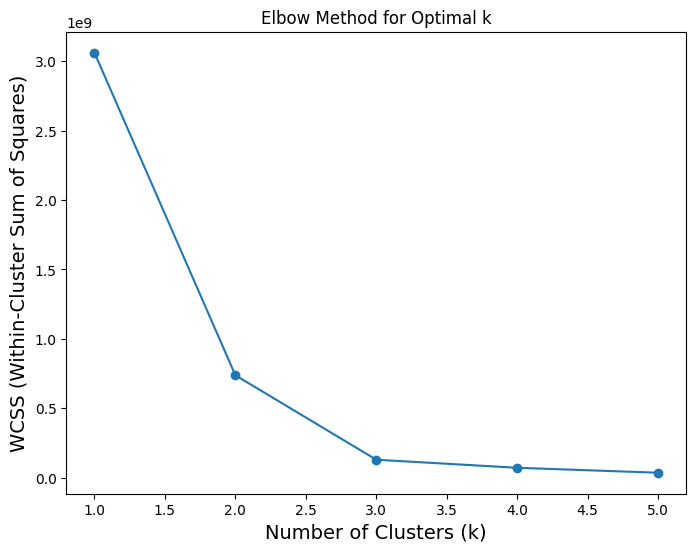

In [ ]:
# Calculate WCSS for different numbers of clusters
WCSS = []
k_values = range(1, 6)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X)
    WCSS.append(km.inertia_)

# Plot WCSS to find the elbow point
plt.figure(figsize=(8, 6))
plt.plot(k_values, WCSS, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=14)
plt.show()

**Interpretation:**

The plot shows that WCSS decreases sharply from 1 to 3 clusters, indicating significant improvement in clustering quality. Beyond 3 clusters, the rate of improvement slows considerably, forming an "elbow" at k = 3. This suggests that 3 clusters is the optimal choice for this dataset, balancing simplicity and effectiveness.

# Conclusion

In conclusion, the analysis highlights the effectiveness of machine learning models like K-Nearest Neighbors and clustering techniques in interpreting electric vehicle data. The KNN model demonstrated strong performance, achieving an accuracy score of 0.8599 in differentiating between five car manufacturers (Tesla, Ford, Nissan, Chevrolet, and BMW) based on Model Year and Electric Range. The scatter plot showed clear distinctions between manufacturers, with Tesla focusing on higher electric ranges, while the others offered a variety of range options. This suggests that these two features are effective for predicting vehicle makes and understanding manufacturer strategies.

Additionally, the clustering analysis revealed three distinct groups based on GHG emissions reductions and petroleum savings. Cluster 0 represented the best-performing group with the highest reductions and savings, Cluster 1 showed the lowest performance, and Cluster 2 reflected moderate results. The clustering effectively identified areas for potential improvement and highlighted key differences in EV performance. The "elbow" method confirmed that using three clusters was optimal for this dataset, balancing simplicity and accuracy. Overall, these methods provided valuable insights into EV trends, manufacturer focus, and environmental impact, offering a framework for further analysis and decision-making.